In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.drop(["CustomerID"], axis = 1, inplace=True)

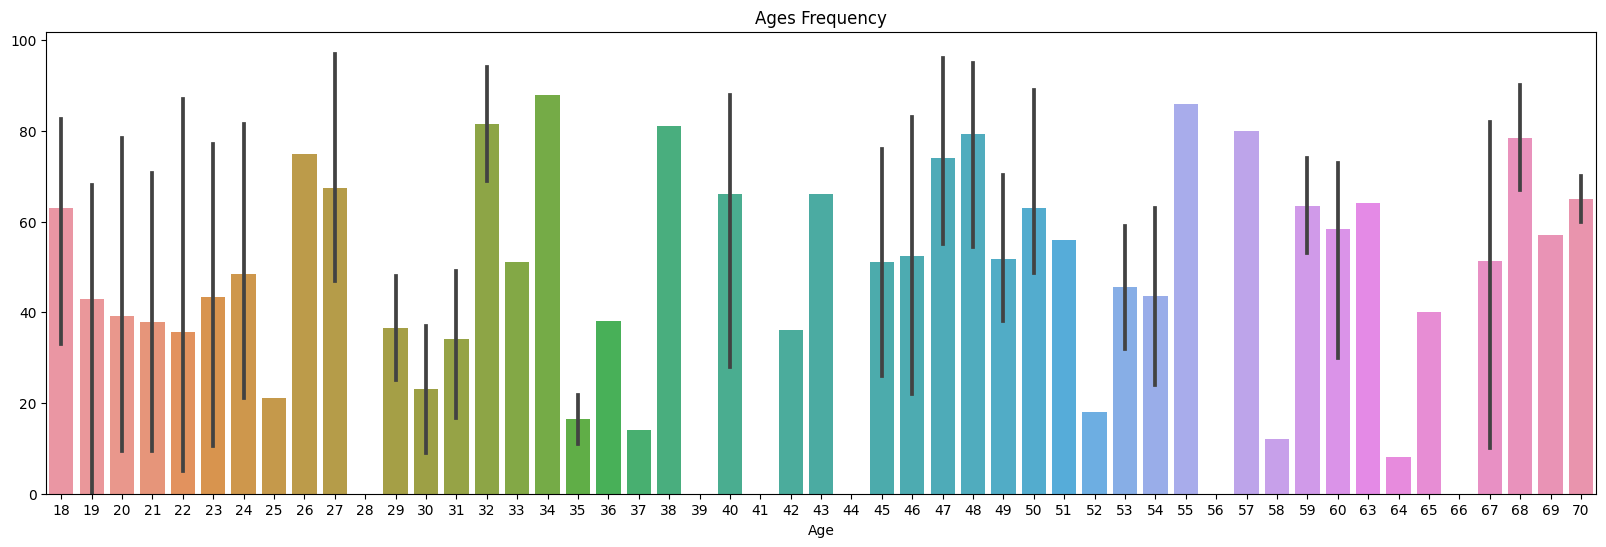

In [22]:
plt.figure(figsize=(20,6))
plt.title("Ages Frequency")
sns.barplot(x='Age', y=pd.Series(range(101)), data=df)
plt.show()

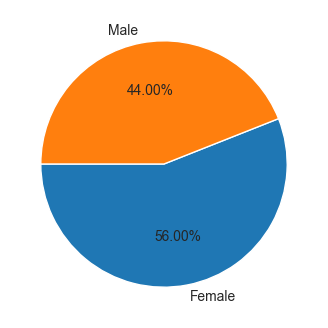

In [40]:
genders = df.Gender.value_counts()
plt.figure(figsize=(4,4))
plt.pie(genders, labels=genders.index, autopct='%1.2f%%', startangle=180)
plt.show()

In [48]:
wcss = [] # Within Cluster Sum Of Squares
for cluster in range(1, 15):
    kmeans_model = KMeans(n_clusters = cluster, init = "k-means++", n_init = 'auto')
    kmeans_model.fit(df.iloc[:, 1:])
    wcss.append(kmeans_model.inertia_)

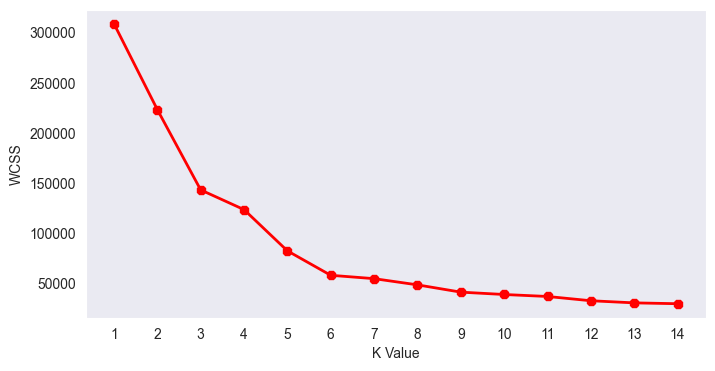

In [50]:
plt.figure(figsize=(8, 4))    
plt.grid()
plt.plot(range(1, 15), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 15, 1))
plt.ylabel("WCSS")
plt.show()

In [66]:
n_clusters_chosen = 7 # can be 6 or 8 too

In [67]:
km = KMeans(n_clusters = n_clusters_chosen, n_init = 'auto')
clusters = km.fit_predict(df.iloc[:, 1:])
df["Label"] = clusters

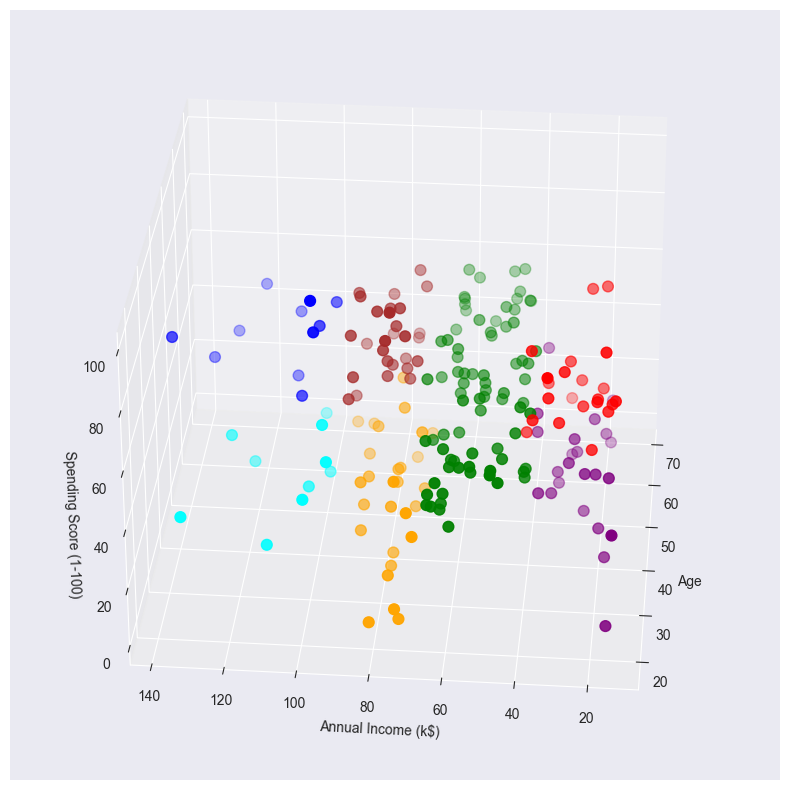

In [68]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.Label == 0], df["Annual Income (k$)"][df.Label == 0], df["Spending Score (1-100)"][df.Label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.Label == 1], df["Annual Income (k$)"][df.Label == 1], df["Spending Score (1-100)"][df.Label == 1], c = 'orange', s = 60)
ax.scatter(df.Age[df.Label == 2], df["Annual Income (k$)"][df.Label == 2], df["Spending Score (1-100)"][df.Label == 2], c = 'green', s = 60)
ax.scatter(df.Age[df.Label == 3], df["Annual Income (k$)"][df.Label == 3], df["Spending Score (1-100)"][df.Label == 3], c = 'red', s = 60)
ax.scatter(df.Age[df.Label == 4], df["Annual Income (k$)"][df.Label == 4], df["Spending Score (1-100)"][df.Label == 4], c = 'purple', s = 60)
ax.scatter(df.Age[df.Label == 5], df["Annual Income (k$)"][df.Label == 5], df["Spending Score (1-100)"][df.Label == 5], c = 'brown', s = 60)
ax.scatter(df.Age[df.Label == 6], df["Annual Income (k$)"][df.Label == 6], df["Spending Score (1-100)"][df.Label == 6], c = 'cyan', s = 60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()